# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click !here goes the icon of the corresponding button in the gutter! button.
To debug a cell, press Alt+Shift+Enter, or click !here goes the icon of the corresponding button in the gutter! button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/jupyter-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [16]:
import json
import re
import unicodedata

with open('data/tokens.json', 'r', encoding='utf-8') as f:
    token_data = json.load(f)

def is_control_word(token):
    control_words = ['<s>', '</s>', '<pad>', '<unk>', '<mask>', '<eos>', '<bos>']
    result = ((token in control_words) or
              (token.startswith('control_')) or
              (token.startswith('[') and token.endswith(']')))
    
    return result

for token in list(token_data.keys())[:10]:  # Test first 10 tokens
    if is_control_word(token):
        print(f"{token} is a control word")

<unk> is a control word
<s> is a control word
</s> is a control word
[INST] is a control word
[/INST] is a control word
[TOOL_CALLS] is a control word
[AVAILABLE_TOOLS] is a control word
[/AVAILABLE_TOOLS] is a control word
[TOOL_RESULTS] is a control word
[/TOOL_RESULTS] is a control word


In [15]:
def is_pure_unicode_byte(token):
    return bool(re.match(r'^<0x[0-9A-F]{2}>$', token))


In [14]:
def is_single_char(token):
    if len(token) != 1:
        return False
    char = token[0]
    return (char.isalpha() or char.isnumeric() or
            unicodedata.category(char).startswith('P') or
            char.isspace())


In [18]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Download necessary NLTK data
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def is_lemma(token):
    if not token.isalpha():
        return False

    lemma = lemmatizer.lemmatize(token, get_wordnet_pos(token))

    return lemma == token

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/Egor.Safronov/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/Egor.Safronov/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [23]:
import syllables

def is_syllable(token):
    if not token.isalpha():
        return False

    return syllables.estimate(token) == 1

In [54]:
!pip uninstall -y numpy

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4


In [55]:
import sys
print(f"Python version: {sys.version}")

try:
    import numpy
    print(f"NumPy imported successfully {numpy.__version__}")
except Exception as e:
    print(f"Error importing NumPy: {e}")

try:
    import spacy
    print("spaCy imported successfully")
except Exception as e:
    print(f"Error importing spaCy: {e}")

Python version: 3.12.2 | packaged by Anaconda, Inc. | (main, Feb 27 2024, 12:57:28) [Clang 14.0.6 ]
NumPy imported successfully 2.0.1
Error importing spaCy: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject


In [ ]:
import spacy
from collections import defaultdict

language_models = {
    'en': spacy.load("en_core_web_sm"),
    'de': spacy.load("de_core_news_sm"),
    'fr': spacy.load("fr_core_news_sm"),
    'es': spacy.load("es_core_news_sm"),
    # Add more models as needed
}

default_model = language_models['en']

def is_lemma_multilingual(token, languages):
    if not token.isalpha():
        return False

    for lang in languages:

        nlp = language_models.get(lang, default_model)


        doc = nlp(token)
        lemma = doc[0].lemma_


        if lemma == token:
            return True

    return False

lemma_count = 0
total_count = len(token_data)

language_lemma_counts = defaultdict(int)

for token, languages in token_data.items():
    if is_lemma_multilingual(token, languages):
        lemma_count += 1
        for lang in languages:
            language_lemma_counts[lang] += 1

print(f"Total lemmas: {lemma_count} out of {total_count} tokens ({lemma_count/total_count:.2%})")

# Print lemma counts for each language
for lang, count in sorted(language_lemma_counts.items(), key=lambda x: x[1], reverse=True):
    print(f"{lang}: {count} lemmas")


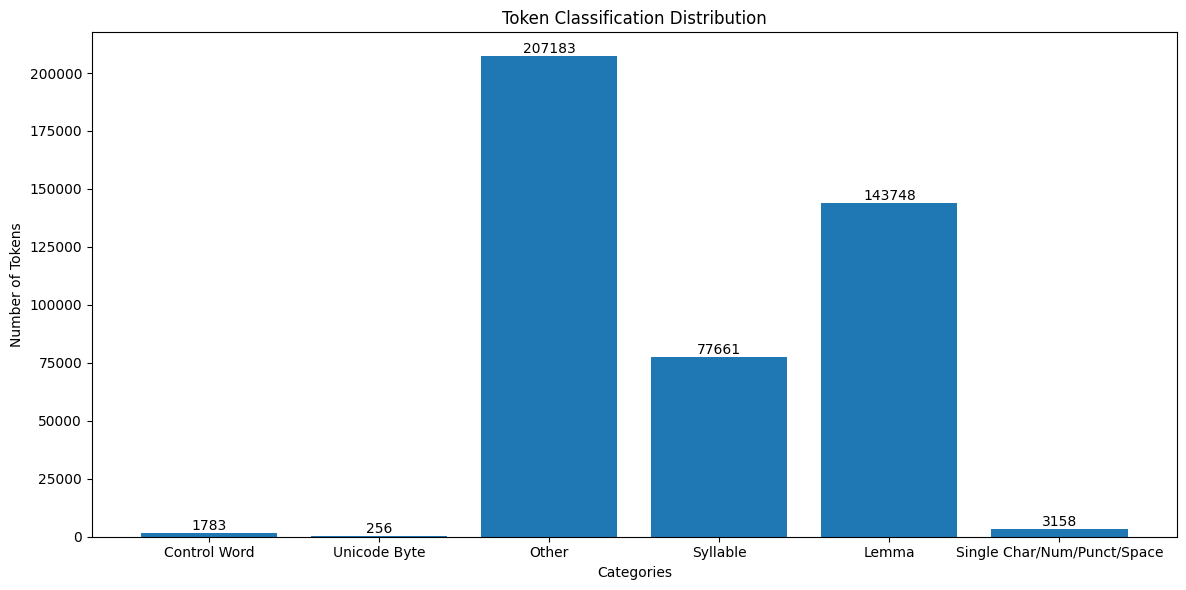

Control Word: 1783 (0.41%)
Unicode Byte: 256 (0.06%)
Other: 207183 (47.76%)
Syllable: 77661 (17.90%)
Lemma: 143748 (33.14%)
Single Char/Num/Punct/Space: 3158 (0.73%)


In [31]:
import matplotlib.pyplot as plt
from collections import Counter

def classify_token(token):
    if is_control_word(token):
        return "Control Word"
    elif is_pure_unicode_byte(token):
        return "Unicode Byte"
    elif is_single_char(token):
        return "Single Char/Num/Punct/Space"
    elif is_syllable(token):
        return "Syllable"
    elif is_lemma(token):
        return "Lemma"
    else:
        return "Other"

classifications = [classify_token(token) for token in token_data.keys()]

classification_counts = Counter(classifications)

categories = list(classification_counts.keys())
counts = list(classification_counts.values())

plt.figure(figsize=(12, 6))
plt.bar(categories, counts)
plt.title("Token Classification Distribution")
plt.xlabel("Categories")
plt.ylabel("Number of Tokens")

for i, v in enumerate(counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

total = sum(counts)
for category, count in classification_counts.items():
    percentage = (count / total) * 100
    print(f"{category}: {count} ({percentage:.2f}%)")